In [3]:
# Load Dataset
import io
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [4]:
# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Elbow Method to determine optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

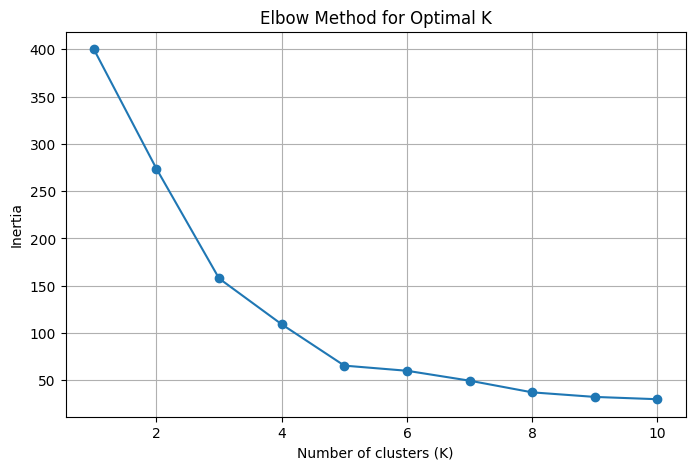

In [7]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [8]:
# Fit KMeans with optimal K=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [9]:
# Assign cluster labels to the dataset
df['Cluster'] = clusters

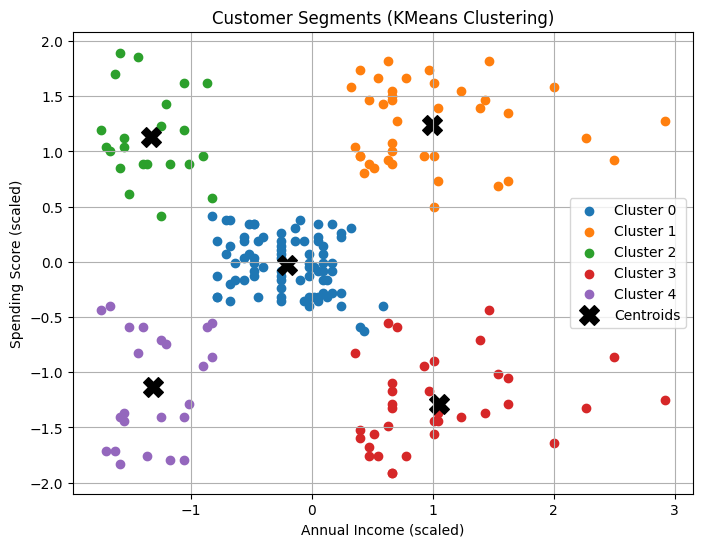

In [10]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(5):
    plt.scatter(
        X_scaled[clusters == cluster_id, 0],
        X_scaled[clusters == cluster_id, 1],
        label=f'Cluster {cluster_id}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title("Customer Segments (KMeans Clustering)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Evaluate clustering using Silhouette Score
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.5547
